In [85]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound

In [3]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [4]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

In [8]:
df

,age,draft_pos,attempts,yards_run,tds_run,longgain_run,yardsperatt,yardspergame_run,Percenthit (%),g,...,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,26,182,75,389,5,75,5.2,77.8,1.100909,9,...,2,12,30,5.8,3.7,29.0,2,5.0,3.0,1.0
1,25,182,236,1084,16,56,4.6,67.8,0.369547,16,...,3,18,67,7.0,3.1,29.6,3,5.0,13.0,6.0
2,24,182,133,728,8,67,5.5,60.7,0.293098,12,...,1,12,24,5.9,2.2,17.2,1,7.0,6.0,12.0
3,23,7,81,448,4,46,5.5,37.3,0.308675,12,...,0,2,9,1.2,0.8,1.8,0,5.0,13.0,2.0
4,35,7,80,314,2,27,3.9,52.3,0.529768,11,...,0,3,18,4.9,1.0,7.1,0,19.0,22.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,22,153,77,312,1,19,4.1,24.0,0.329198,13,...,0,1,18,4.2,0.5,4.2,1,13.0,13.0,12.0
584,32,23,138,377,2,16,2.7,31.4,0.398135,12,...,0,0,9,1.8,0.7,1.7,1,18.0,29.0,18.0
585,24,160,31,89,1,18,2.9,11.1,0.408291,8,...,0,4,16,5.4,1.1,8.1,0,26.0,15.0,26.0
586,23,160,76,293,1,16,3.9,22.5,0.405357,13,...,0,9,17,6.6,1.4,11.7,2,18.0,17.0,29.0


In [14]:
df.dtypes

age                           int64
draft_pos                     int64
attempts                      int64
yards_run                     int64
tds_run                       int64
longgain_run                  int64
yardsperatt                 float64
yardspergame_run            float64
Percenthit (%)              float64
g                             int64
gs                            int64
tgt                           int64
rec                           int64
yards_rec                     int64
yardsperrec                 float64
tds_rec                       int64
firstdowns                    int64
longgain_rec                  int64
yardspertarget              float64
recpergame                  float64
yardspergame_rec            float64
fumbles                       int64
team_adjusted_line_yards    float64
team_running_back_yards     float64
team_stuffed_rate           float64
dtype: object

In [15]:
len(df.dtypes)

25

splitting & Scaling

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [19]:
len(X_test[1])

24

In [74]:

# X_train.shape
# model = Sequential()

# model.add(Dense(24, activation="relu"))
# model.add(Dense(4, activation="relu"))
# model.add(Dense(4, activation="relu"))
# model.add(Dense(1))

# model.compile(optimizer="adam", loss="mse")
# model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=200)

Epoch 1/200
13/13 [==============================] - 0s 9ms/step - loss: 6.9713 - val_loss: 6.3801
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 6.6491 - val_loss: 5.9190
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 5.9567 - val_loss: 4.9658
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 5.0068 - val_loss: 3.9708
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 4.2327 - val_loss: 3.3837
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 3.9314 - val_loss: 3.2414
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 3.8721 - val_loss: 3.1829
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 3.8225 - val_loss: 3.1316
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 3.7622 - val_loss: 3.0770
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 3.7106 - val_loss: 3.0289
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 2.1886 - val_loss: 1.8535
Epoch 84/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1675 - val_loss: 1.8828
Epoch 85/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1662 - val_loss: 1.9097
Epoch 86/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1636 - val_loss: 1.8602
Epoch 87/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1518 - val_loss: 1.8751
Epoch 88/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1480 - val_loss: 1.9324
Epoch 89/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1524 - val_loss: 1.8490
Epoch 90/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1172 - val_loss: 1.9099
Epoch 91/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1189 - val_loss: 1.8652
Epoch 92/200
13/13 [==============================] - 0s 3ms/step - loss: 2.1286 - val_loss: 1.8363
Epoch 93/200


MSE:  1.9103916982084845
RMSE:  1.3821692002821089
MAE:  0.8913044399167874
ESV:  0.4673846658978007


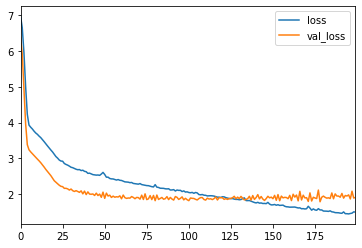

In [75]:
losses = pd.DataFrame(model.history.history)
losses.plot()

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

In [66]:
#model.save('./savedmodels/57dnn')

INFO:tensorflow:Assets written to: ./savedmodels/57dnn\assets


In [70]:
# loaded_model = tf.keras.models.load_model('./savedmodels/57dnn/')
# predictions = loaded_model.predict(X_test)
# print("MSE: ",mean_squared_error(y_test,predictions) )
# print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
# print("MAE: ",mean_absolute_error(y_test,predictions) )
# print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  1.5116196108261575
RMSE:  1.229479406426215
MAE:  0.8543110217145217
ESV:  0.5781866537480842


In [99]:
for i in range(10):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(24, activation="relu"))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=200)
    
    predictions = model.predict(X_test)
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .58):
        winsound.Beep(512, 375)
        break

winsound.Beep(512, 375)

Epoch 1/200
13/13 [==============================] - 0s 10ms/step - loss: 6.0407 - val_loss: 4.5202
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 4.7901 - val_loss: 3.3758
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 3.9583 - val_loss: 2.9554
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 3.7840 - val_loss: 2.9079
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 3.6792 - val_loss: 2.8069
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 3.5760 - val_loss: 2.7299
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 3.5034 - val_loss: 2.6570
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 3.4231 - val_loss: 2.5840
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 3.3462 - val_loss: 2.5150
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 3.2824 - val_loss: 2.4592
Epoch 11

13/13 [==============================] - 0s 2ms/step - loss: 1.5493 - val_loss: 2.2736
Epoch 162/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5222 - val_loss: 2.2850
Epoch 163/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5178 - val_loss: 2.2482
Epoch 164/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5526 - val_loss: 2.0248
Epoch 165/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5120 - val_loss: 2.6105
Epoch 166/200
13/13 [==============================] - 0s 3ms/step - loss: 1.5298 - val_loss: 2.0640
Epoch 167/200
13/13 [==============================] - 0s 3ms/step - loss: 1.5103 - val_loss: 2.2666
Epoch 168/200
13/13 [==============================] - 0s 2ms/step - loss: 1.4658 - val_loss: 2.4750
Epoch 169/200
13/13 [==============================] - 0s 2ms/step - loss: 1.4724 - val_loss: 2.2493
Epoch 170/200
13/13 [==============================] - 0s 2ms/step - loss: 1.4748 - val_loss: 2.6736
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 1.8906 - val_loss: 1.8431
Epoch 124/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8724 - val_loss: 1.8335
Epoch 125/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8796 - val_loss: 1.7551
Epoch 126/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8845 - val_loss: 1.7747
Epoch 127/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8464 - val_loss: 1.7663
Epoch 128/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8249 - val_loss: 1.8562
Epoch 129/200
13/13 [==============================] - 0s 4ms/step - loss: 1.8413 - val_loss: 1.7045
Epoch 130/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8490 - val_loss: 1.8417
Epoch 131/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8234 - val_loss: 1.7958
Epoch 132/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8482 - val_loss: 1.7586
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 6.8524 - val_loss: 6.3417
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 6.8113 - val_loss: 6.2999
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 6.7693 - val_loss: 6.2592
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 6.7276 - val_loss: 6.2194
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 6.6887 - val_loss: 6.1782
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 6.6481 - val_loss: 6.1382
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 6.6074 - val_loss: 6.0997
Epoch 11/200
13/13 [==============================] - 0s 2ms/step - loss: 6.5684 - val_loss: 6.0610
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 6.5307 - val_loss: 6.0217
Epoch 13/200
13/13 [==============================] - 0s 2ms/step - loss: 6.4907 - val_loss: 5.9848
Epoch 14/200
13/13

13/13 [==============================] - 0s 3ms/step - loss: 3.5439 - val_loss: 3.2393
Epoch 167/200
13/13 [==============================] - 0s 2ms/step - loss: 3.5315 - val_loss: 3.2339
Epoch 168/200
13/13 [==============================] - 0s 3ms/step - loss: 3.5290 - val_loss: 3.2340
Epoch 169/200
13/13 [==============================] - 0s 3ms/step - loss: 3.5212 - val_loss: 3.2174
Epoch 170/200
13/13 [==============================] - 0s 2ms/step - loss: 3.5121 - val_loss: 3.2134
Epoch 171/200
13/13 [==============================] - 0s 3ms/step - loss: 3.5030 - val_loss: 3.2156
Epoch 172/200
13/13 [==============================] - 0s 2ms/step - loss: 3.4903 - val_loss: 3.2004
Epoch 173/200
13/13 [==============================] - 0s 2ms/step - loss: 3.4751 - val_loss: 3.1907
Epoch 174/200
13/13 [==============================] - 0s 3ms/step - loss: 3.4648 - val_loss: 3.1879
Epoch 175/200
13/13 [==============================] - 0s 3ms/step - loss: 3.4534 - val_loss: 3.1777
Epoc

Epoch 129/200
13/13 [==============================] - 0s 2ms/step - loss: 1.8346 - val_loss: 1.9259
Epoch 130/200
13/13 [==============================] - 0s 2ms/step - loss: 1.8540 - val_loss: 1.7854
Epoch 131/200
13/13 [==============================] - 0s 2ms/step - loss: 1.8614 - val_loss: 2.0299
Epoch 132/200
13/13 [==============================] - 0s 3ms/step - loss: 1.8019 - val_loss: 1.8701
Epoch 133/200
13/13 [==============================] - 0s 2ms/step - loss: 1.7963 - val_loss: 1.9391
Epoch 134/200
13/13 [==============================] - 0s 3ms/step - loss: 1.7838 - val_loss: 1.8759
Epoch 135/200
13/13 [==============================] - 0s 2ms/step - loss: 1.7764 - val_loss: 1.9478
Epoch 136/200
13/13 [==============================] - 0s 3ms/step - loss: 1.7804 - val_loss: 1.8516
Epoch 137/200
13/13 [==============================] - 0s 2ms/step - loss: 1.7667 - val_loss: 2.0244
Epoch 138/200
13/13 [==============================] - 0s 2ms/step - loss: 1.7774 - val_los

Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 3.5729 - val_loss: 2.9603
Epoch 11/200
13/13 [==============================] - 0s 2ms/step - loss: 3.5344 - val_loss: 2.9069
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 3.4902 - val_loss: 2.8661
Epoch 13/200
13/13 [==============================] - 0s 2ms/step - loss: 3.4566 - val_loss: 2.8255
Epoch 14/200
13/13 [==============================] - 0s 2ms/step - loss: 3.4180 - val_loss: 2.7818
Epoch 15/200
13/13 [==============================] - 0s 2ms/step - loss: 3.3715 - val_loss: 2.7399
Epoch 16/200
13/13 [==============================] - 0s 2ms/step - loss: 3.3372 - val_loss: 2.7069
Epoch 17/200
13/13 [==============================] - 0s 2ms/step - loss: 3.2858 - val_loss: 2.6343
Epoch 18/200
13/13 [==============================] - 0s 2ms/step - loss: 3.1984 - val_loss: 2.5467
Epoch 19/200
13/13 [==============================] - 0s 3ms/step - loss: 3.1228 - val_loss: 2.4869


Epoch 92/200
13/13 [==============================] - 0s 3ms/step - loss: 2.2172 - val_loss: 1.8785
Epoch 93/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2270 - val_loss: 1.8820
Epoch 94/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2161 - val_loss: 1.9267
Epoch 95/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1940 - val_loss: 1.8235
Epoch 96/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2017 - val_loss: 1.9793
Epoch 97/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1937 - val_loss: 1.8546
Epoch 98/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2187 - val_loss: 1.8705
Epoch 99/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1996 - val_loss: 1.9330
Epoch 100/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1712 - val_loss: 1.9128
Epoch 101/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1632 - val_loss: 1.898

13/13 [==============================] - 0s 2ms/step - loss: 2.4433 - val_loss: 2.1516
Epoch 55/200
13/13 [==============================] - 0s 3ms/step - loss: 2.4308 - val_loss: 1.9615
Epoch 56/200
13/13 [==============================] - 0s 2ms/step - loss: 2.4153 - val_loss: 2.1013
Epoch 57/200
13/13 [==============================] - 0s 2ms/step - loss: 2.4011 - val_loss: 2.0946
Epoch 58/200
13/13 [==============================] - 0s 2ms/step - loss: 2.4012 - val_loss: 2.0715
Epoch 59/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3839 - val_loss: 2.0462
Epoch 60/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3747 - val_loss: 2.0747
Epoch 61/200
13/13 [==============================] - 0s 2ms/step - loss: 2.4109 - val_loss: 2.0516
Epoch 62/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3801 - val_loss: 1.9933
Epoch 63/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3728 - val_loss: 2.0825
Epoch 64/200


13/13 [==============================] - 0s 2ms/step - loss: 3.3733 - val_loss: 2.7882
Epoch 17/200
13/13 [==============================] - 0s 2ms/step - loss: 3.3315 - val_loss: 2.7475
Epoch 18/200
13/13 [==============================] - 0s 2ms/step - loss: 3.2936 - val_loss: 2.7046
Epoch 19/200
13/13 [==============================] - 0s 3ms/step - loss: 3.2556 - val_loss: 2.6668
Epoch 20/200
13/13 [==============================] - 0s 2ms/step - loss: 3.2147 - val_loss: 2.6346
Epoch 21/200
13/13 [==============================] - 0s 2ms/step - loss: 3.1799 - val_loss: 2.5927
Epoch 22/200
13/13 [==============================] - 0s 3ms/step - loss: 3.1643 - val_loss: 2.5593
Epoch 23/200
13/13 [==============================] - 0s 2ms/step - loss: 3.1108 - val_loss: 2.5266
Epoch 24/200
13/13 [==============================] - 0s 2ms/step - loss: 3.0877 - val_loss: 2.4923
Epoch 25/200
13/13 [==============================] - 0s 2ms/step - loss: 3.0448 - val_loss: 2.4688
Epoch 26/200


13/13 [==============================] - 0s 2ms/step - loss: 2.2166 - val_loss: 1.9522
Epoch 99/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2188 - val_loss: 1.9294
Epoch 100/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2066 - val_loss: 1.9237
Epoch 101/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1991 - val_loss: 1.9697
Epoch 102/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1856 - val_loss: 1.9086
Epoch 103/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2197 - val_loss: 1.9604
Epoch 104/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1829 - val_loss: 1.8824
Epoch 105/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1769 - val_loss: 1.9243
Epoch 106/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1706 - val_loss: 1.9199
Epoch 107/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1621 - val_loss: 1.8631
Epoch

13/13 [==============================] - 0s 2ms/step - loss: 2.2659 - val_loss: 2.0854
Epoch 61/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2673 - val_loss: 2.1826
Epoch 62/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2517 - val_loss: 2.0567
Epoch 63/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2568 - val_loss: 2.1756
Epoch 64/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2171 - val_loss: 2.0250
Epoch 65/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2220 - val_loss: 2.1042
Epoch 66/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1921 - val_loss: 2.0953
Epoch 67/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1883 - val_loss: 2.0442
Epoch 68/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1911 - val_loss: 2.2378
Epoch 69/200
13/13 [==============================] - 0s 2ms/step - loss: 2.1788 - val_loss: 2.1038
Epoch 70/200


13/13 [==============================] - 0s 3ms/step - loss: 3.7890 - val_loss: 3.1807
Epoch 23/200
13/13 [==============================] - 0s 3ms/step - loss: 3.7275 - val_loss: 3.1146
Epoch 24/200
13/13 [==============================] - 0s 3ms/step - loss: 3.6668 - val_loss: 3.0636
Epoch 25/200
13/13 [==============================] - 0s 3ms/step - loss: 3.6242 - val_loss: 3.0161
Epoch 26/200
13/13 [==============================] - 0s 9ms/step - loss: 3.5775 - val_loss: 2.9667
Epoch 27/200
13/13 [==============================] - 0s 5ms/step - loss: 3.5353 - val_loss: 2.9116
Epoch 28/200
13/13 [==============================] - 0s 4ms/step - loss: 3.4820 - val_loss: 2.8509
Epoch 29/200
13/13 [==============================] - 0s 4ms/step - loss: 3.4237 - val_loss: 2.7970
Epoch 30/200
13/13 [==============================] - 0s 4ms/step - loss: 3.3729 - val_loss: 2.7352
Epoch 31/200
13/13 [==============================] - 0s 4ms/step - loss: 3.3108 - val_loss: 2.6718
Epoch 32/200


13/13 [==============================] - 0s 2ms/step - loss: 2.2613 - val_loss: 2.0493
Epoch 105/200
13/13 [==============================] - 0s 3ms/step - loss: 2.2719 - val_loss: 2.0162
Epoch 106/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2618 - val_loss: 2.0559
Epoch 107/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2636 - val_loss: 2.0309
Epoch 108/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2350 - val_loss: 1.9818
Epoch 109/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2514 - val_loss: 2.0983
Epoch 110/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2313 - val_loss: 1.9860
Epoch 111/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2583 - val_loss: 2.0475
Epoch 112/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2476 - val_loss: 1.9584
Epoch 113/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2649 - val_loss: 2.0131
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 2.3600 - val_loss: 1.8697
Epoch 67/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3741 - val_loss: 1.7942
Epoch 68/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3320 - val_loss: 1.8600
Epoch 69/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3340 - val_loss: 1.8595
Epoch 70/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3338 - val_loss: 1.8085
Epoch 71/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3180 - val_loss: 1.9070
Epoch 72/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3110 - val_loss: 1.8006
Epoch 73/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3053 - val_loss: 1.8213
Epoch 74/200
13/13 [==============================] - 0s 2ms/step - loss: 2.3175 - val_loss: 1.8478
Epoch 75/200
13/13 [==============================] - 0s 2ms/step - loss: 2.2731 - val_loss: 1.7806
Epoch 76/200


In [94]:
esv =np.empty(10)

In [95]:
esv

array([ 0.1 ,  0.2 ,  0.25,  0.5 ,  1.  ,  2.  ,  2.5 ,  5.  , 10.  ,
       20.  ])